# This notebook contains queries and visualizations for the Chinook Analysis using SQL project


In [8]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
engine = create_engine('sqlite:///chinook.db')

### Query1: Who is the best customer?

In [12]:
q1='''
Select Customer.CustomerId ,sum(Invoice.Total) as tootal From Customer
Join Invoice
On 
Customer.CustomerId=Invoice.CustomerId
GROUP By Customer.CustomerId 
Order By tootal DESC
Limit 10;
'''

In [13]:
df1=pd.read_sql(q1,engine)
df1

,CustomerId,tootal
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62
5,28,43.62
6,24,43.62
7,37,43.62
8,7,42.62
9,25,42.62


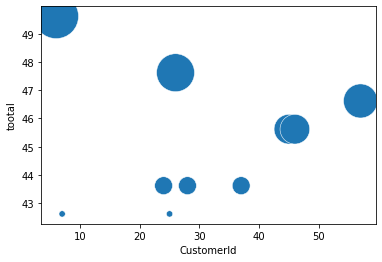

In [14]:
#we will use bubble plot with Scatterplot
sns.scatterplot(data=df1,x="CustomerId",y="tootal",size="tootal",legend=False,sizes=(40,2000))
plt.show()

### Query2:who have written the most rock music?

In [15]:
q2='''
Select Artist.ArtistId,Artist.Name ,count(Track.Name)as songs From  Album
Join Artist
On
 Album.ArtistId=Artist.ArtistId 
Join Track
On Track.AlbumId=Album.AlbumId
Join Genre
On Track.GenreId=Genre.GenreId
WHERE Genre.Name="Rock"  
GROUP by Artist.ArtistId,Artist.Name,Genre.Name
ORDER by songs DESC 
LIMIT 10;
'''

In [16]:
df2 = pd.read_sql(q2, engine)
df2

,ArtistId,Name,songs
0,22,Led Zeppelin,114
1,150,U2,112
2,58,Deep Purple,92
3,90,Iron Maiden,81
4,118,Pearl Jam,54
5,152,Van Halen,52
6,51,Queen,45
7,142,The Rolling Stones,41
8,76,Creedence Clearwater Revival,40
9,52,Kiss,35


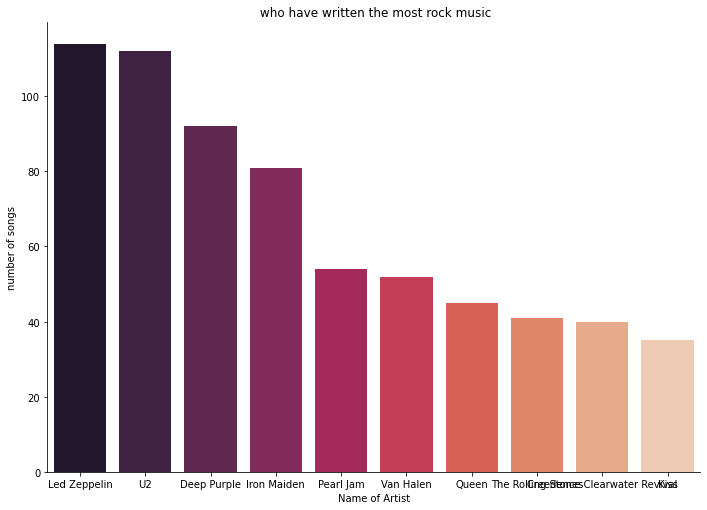

In [17]:

fig,v = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.despine()
v= sns.barplot(x=df2.Name, y=df2.songs , palette='rocket')
plt.xlabel("Name of Artist")
plt.ylabel("number of songs")
plt.title(" who have written the most rock music")
plt.show(fig)

### Query3: which artist has earned the most according to the InvoiceLines?

In [18]:
q3='''
SELECT Artist.Name ,SUM(InvoiceLine.Quantity * InvoiceLine.UnitPrice)AS AmountSpent  FROM InvoiceLine 
JOIN Track
ON Track.TrackId=InvoiceLine.TrackId
Join Album
On Track.AlbumId=Album.AlbumId 
Join Artist
On Artist.ArtistId=Album.ArtistId
GROUP BY Artist.Name
ORDER BY AmountSpent DESC
Limit 6;
'''

In [19]:
df3=pd.read_sql(q3,engine)
df3

,Name,AmountSpent
0,Iron Maiden,138.60
1,U2,105.93
2,Metallica,90.09
3,Led Zeppelin,86.13
4,Lost,81.59
5,The Office,49.75


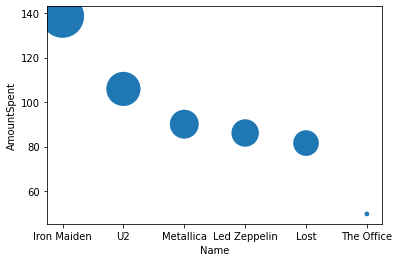

In [20]:
sns.scatterplot(data=df3,x="Name",y="AmountSpent",size="AmountSpent",legend=False,sizes=(40,2000))
plt.show()

### Query 4: who customer that has spent the most on music for each country?

In [21]:
q4='''
SELECT  Customer.Country, SUM(Invoice.Total) AS TotalSpent , Customer.FirstName , Customer.LastName ,Customer.CustomerId
FROM Customer 
JOIN Invoice 
ON Invoice.CustomerId = Customer.CustomerId
GROUP BY Customer.CustomerId, Customer.FirstName, Customer.LastName, Customer.Country
ORDER BY Customer.Country DESC  
Limit 25;
'''

In [22]:
df4 = pd.read_sql(q4, engine)
df4

,Country,TotalSpent,FirstName,LastName,CustomerId
0,United Kingdom,37.62,Emma,Jones,52
1,United Kingdom,37.62,Phil,Hughes,53
2,United Kingdom,37.62,Steve,Murray,54
3,USA,37.62,Frank,Harris,16
4,USA,39.62,Jack,Smith,17
5,USA,37.62,Michelle,Brooks,18
6,USA,38.62,Tim,Goyer,19
7,USA,39.62,Dan,Miller,20
8,USA,37.62,Kathy,Chase,21
9,USA,39.62,Heather,Leacock,22


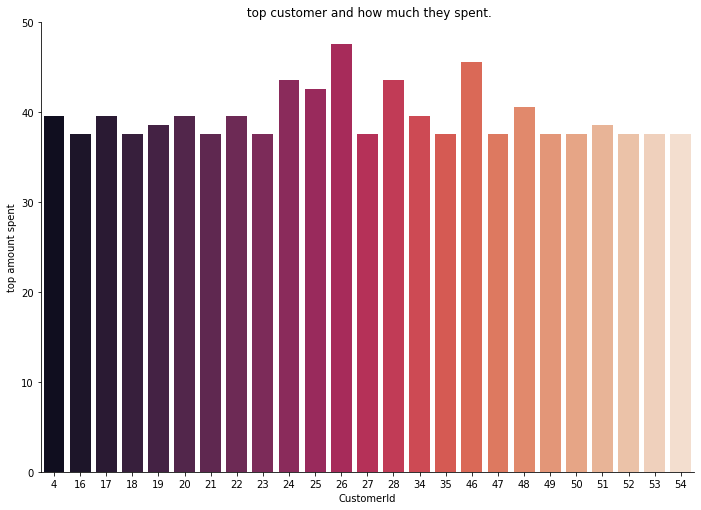

In [23]:
# Lets see the distribution of top-spenders along Name of Artist
fig,v = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.despine()
v= sns.barplot(x=df4.CustomerId, y=df4.TotalSpent , palette='rocket')
plt.xlabel("CustomerId")
plt.ylabel("top amount spent")
plt.title(" top customer and how much they spent.")
plt.show(fig)